<a href="https://colab.research.google.com/github/Datamin-D/TIL/blob/master/%5BAuto_ML%5D_Regression_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pycaret 예제.
#https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

In [ ]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

In [3]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123)

In [ ]:
best = compare_models(exclude = ['ransac'])

In [ ]:
#create model
ada = create_model('ada')
print(ada)

In [ ]:
#tune model
tuned_ada = tune_model(ada)

In [ ]:
# # tune light gbm
# import numpy as np
# lgbm_params = {'num_leaves': np.arange(10,200,10),
#                         'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
#                         'learning_rate': np.arange(0.1,1,0.1)
#                         }

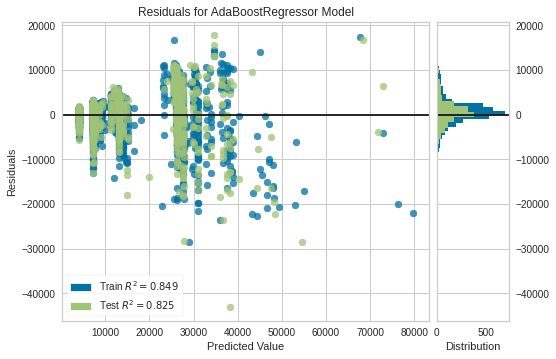

In [10]:
#plot model
plot_model(tuned_ada)

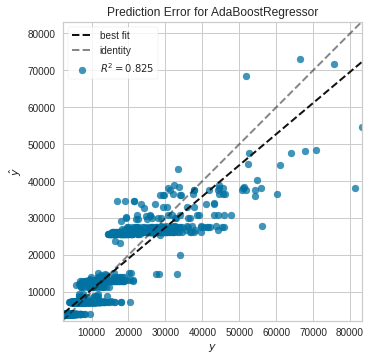

In [11]:
plot_model(tuned_ada, plot = 'error')

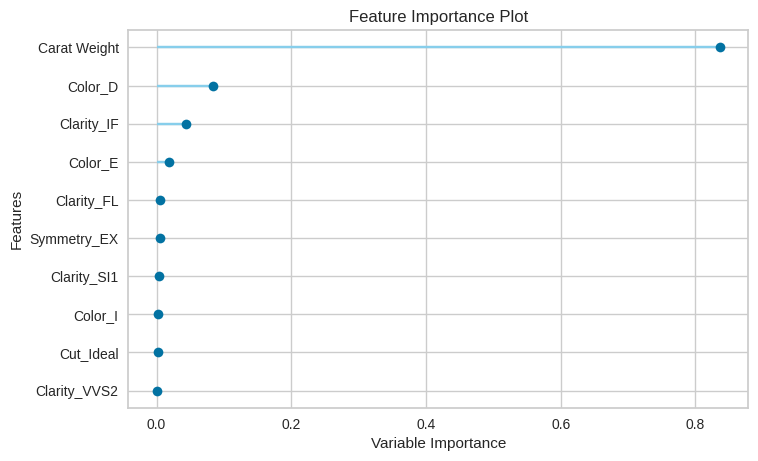

In [12]:
plot_model(tuned_ada, plot='feature')

In [14]:
evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
predict_model(tuned_ada)

NameError: ignored

In [ ]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

In [ ]:
saved_final_lightgbm = load_model('Final LightGBM Model 25Nov2020')

In [ ]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')